# Post-hoc Tests (Instructional Worksheet)

Based on our ANOVA analyses from the last module, we know that there is a difference between the mean petal length of different species of iris from the *iris* built-in dataset. Now that we know there is a difference, how do we identify the differences between specific pairs (i.e., which groups are different from one another)? We could figure this out by running a series of pair-wise t-tests like we did in previous modules - however, the better route is to instead use a multiple comparison method, which controls for overall type I error, which you read about in your textbook.

We will go through how to run two different multiple comparison method: Tukey HSD and Scheffe's Test.

## Tukey HSD

The Tukey HSD, or Tukey Honest Significant Differences Method, runs a series of pairwise t-tests, but then adjuts the p-values to control overall type I error. In Python, we will use the *TukeyHDS()* function.

In [5]:
import pandas as pd
import statsmodels.stats.api as sms

iris = pd.read_csv('../data/iris.csv')

In [7]:
print(sms.multicomp.pairwise_tukeyhsd(iris['Petal.Length'], iris['Species']))

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1     group2   meandiff lower  upper  reject
---------------------------------------------------
  setosa   versicolor  2.798   2.5942 3.0018  True 
  setosa   virginica    4.09   3.8862 4.2938  True 
versicolor virginica   1.292   1.0882 1.4958  True 
---------------------------------------------------


From the output, we can see the pair-wise comparisons between the three different iris species. For each pair, we are given the difference (diff) between the means of the pair, the lower (lwr) and upper (upr) confidence interval around the difference in means.
In this situation, the p-value for each pair is 0, which is significant since 0 < 0.5.

Overall, these results tell us that there is a significant different in petal length between all 3 of the iris species.

If we want our results using a 99% confidence level we can add the *alpha* argument.

In [9]:
print(sms.multicomp.pairwise_tukeyhsd(iris['Petal.Length'], iris['Species'], alpha=0.01))

 Multiple Comparison of Means - Tukey HSD,FWER=0.01
  group1     group2   meandiff lower  upper  reject
---------------------------------------------------
  setosa   versicolor  2.798   2.5433 3.0527  True 
  setosa   virginica    4.09   3.8353 4.3447  True 
versicolor virginica   1.292   1.0373 1.5467  True 
---------------------------------------------------


You'll notice that the difference and the rejection does not change, but the confidence intervals are now 99% confidence intervals instead of 95%.

## Problem Set

1. We will now use the *PlantGrowth* built-in dataset that we used in an earlier module. This dataset gives us the dried weight of plants under three different groups: ctrl, trt1, trt2. First, let's create a boxplot of the weight for each group to see if there are any obvious differences in mean weight between groups.

2. Run a TukeyHSD post-hoc test to find out the difference for each pair-wise comparison. Are any of the groups significantly different?

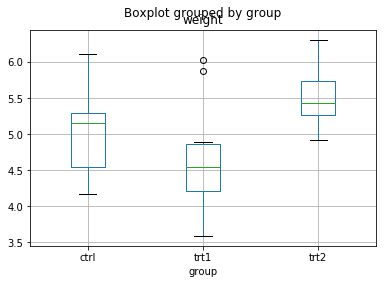

In [28]:
PlantGrowth = pd.read_csv('../data/PlantGrowth.csv')
import matplotlib.pyplot as plt

PlantGrowth.boxplot(column=['weight'], by='group')

In [30]:
print(sms.multicomp.pairwise_tukeyhsd(PlantGrowth['weight'], PlantGrowth['group']))

#different between treatment 1 and 2 but not between control and treatment 1 or 2


Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 ctrl   trt1   -0.371  -1.0621 0.3201 False 
 ctrl   trt2   0.494   -0.1971 1.1851 False 
 trt1   trt2   0.865    0.1739 1.5561  True 
--------------------------------------------
